# Lesson I 

## Importing Flat Files From the Web

We are now able to import data in Python from all sorts of file types:

* Flat files: .txt, .csv
* Pickled files, Excel Spreadsheets, and many others!
* Data from relational databases

However, all of these skill involve importing data from files that you have locally. What if your data is online?

We can use our browser and navigate the relevant URL, and download the file but this poses a few problems:
* It isn't written in code and so posses reproducibility
* It is **NOT** scalable.

### We'll learn how to...

* Import and locally save datasets from the web
* Load datasets into pandas DataFrames
* Make HTTP requests (GET requests)
* Scrape web data such as HTML
* Parse HTML into useful data (BeautifulSoup)
* Use the urllib and requests packages

We'll first check out urllib:

### The urllib package

This module provides a high-level interface for fetching data across the World Wide Web, in particular, the ```urlopen()``` function is similiar to the built-in function ```open()```, but accepts Universal Resource Locators(URLs) instead of filenames.

#### How to automate file download in Python

```python
from urllib.request import urlretrieve
url = 'htttp://SOME--URL--.com'
urlretrieve(url, 'winequality_white.csv')
```



# Exercise Importing flat files from the web

You are about to import your first file from the web! The flat file you will import will be ```'winequality-red.csv'``` from the University of California, Irvine's [Machine Learning repository](https://archive.ics.uci.edu/ml/index.php). The flat file contains tabular data of physiochemical properties of red wine, such as pH, alcohol content and citric acid content, along with wine quality rating.

The URL of the file is:

``` 
'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
```

In [3]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file : url
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'datasets/winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('datasets/winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Opening and reading flat files from the web

You have just imported a file from the web, saved it locally and loaded it into a DataFrame. If you just wanted to load a file from the web into a DataFrame without first saving it locally, you can do that easily using ```pandas```. In particular, you can use the function ```pd.read_csv()``` with the URL as the first argument and the separator ```sep``` as the second argument.

The URL of the file, once again, is:

```
'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
```

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

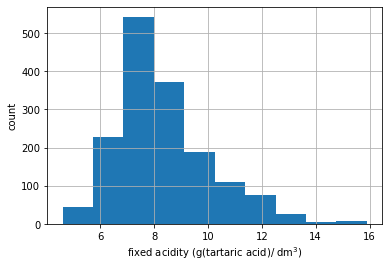

In [5]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file : url
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
df.iloc[:, 0].hist()
plt.xlabel('fixed acidity (g(tartaric acid)/ dm$^3$)')
plt.ylabel('count')
plt.show()

## Importing non-flat files from the web

Congrats! You've just loaded a flat file from the web into a DataFrame without first saving it locally using the ```pandas``` function ```pd.read_csv()```. This function is super cool because it has close relatives that allow you to load all types of files, not only flat ones. In this interactive exercise, you'll use ```pd.read_excel()``` to import an Excel spreadsheet.

The URL of the spreadsheet is :

```
'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'
```

Your job is to use ```pd.read_excel()``` to read in all of its sheets, print the sheet names and then print the head of the first sheet using its name, not its index.

Note that the output of ```pd.read_excel()``` is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

In [6]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xls
xls = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
print(xls.keys())

# Print the head of the first sheet (using its name, Not its index)
print(xls['1700'].head())

dict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000
